In [1]:
! pip install langchain_community
! pip install openai
! pip install langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 4.9 MB/s eta 0:00:00


In [11]:
import os
#Aqui va su API KEY
# os.environ['OPENAI_API_KEY'] =""


In [12]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI

In [13]:
chat = ChatOpenAI(model = "gpt-4o",
                  api_key=os.getenv("OPENAI_API_KEY"))

In [14]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NLP Agosto 2025/respuestas_cafeteria.csv")
df.head()

,role,genre,age,comment,kind_of_comment,complaint
0,alumno,hombre,29,El precio de la comida está carísimo para lo q...,negativo,precio
1,trabajador,hombre,48,"Todo bien, gracias por mantener la cafetería o...",neutro,NaN
2,madre,mujer,69,"Como madre de familia, el sabor de la comida d...",negativo,sabor
3,alumno,mujer,20,Me encanta la vibra de la cafetería; siempre h...,positivo,NaN
4,alumno,hombre,25,El precio está caro para lo que ofrecen y la a...,negativo,precio


In [77]:
prompt = """
Eres un modelo que detecta el tipo de queja de un review, cada queja solo puede tener una opcion
y las opciones son:
Por precio, Por infraestructura, Ninguna, Por alimentos
SOLAMENTE CONTESTA CON EL TIPO DE QUEJA EN ESPAÑOL
No regreses nada mas

Por ejemplo:
Review: La cafetería tiene la peor comida del mundo
Devuelve: Por alimentos

Review: La cafetería tiene los peores precios
Devuelve: Por precio

Review: Las mesas son terribles
Devuelve: Por infraestructurs

Puede recibir reviews en muchos idiomas, pero tu etiqueta final
de sentimientos DEBE SIEMPRE de estar en español
"""

#Zero-shot learning/prompting -- no ejemplos
#Few-shot learning/prompting -- poquitos ejemplos
def etiquetar(texto):
  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=texto)
  ])
  return result.content


In [78]:
from tqdm import tqdm
tqdm.pandas()

In [79]:
df = df.dropna(subset=['comment'])

In [80]:
df["etiqueta"] = df["comment"].progress_apply(etiquetar)

100%|██████████| 991/991 [09:01<00:00,  1.83it/s]


In [81]:
df.head()

,role,genre,age,comment,kind_of_comment,complaint,etiqueta,category,vector
0,alumno,hombre,29,El precio de la comida está carísimo para lo q...,negativo,precio,Por precio,0,"[-0.14875248, 2.44785, -1.1195225, 1.2586325, ..."
1,trabajador,hombre,48,"Todo bien, gracias por mantener la cafetería o...",neutro,NaN,Ninguna,1,"[0.15680596, 0.423218, 0.36181802, 0.18416801,..."
2,madre,mujer,69,"Como madre de familia, el sabor de la comida d...",negativo,sabor,Por alimentos,2,"[-0.181757, 1.1510206, -0.35793504, -0.1755714..."
3,alumno,mujer,20,Me encanta la vibra de la cafetería; siempre h...,positivo,NaN,Ninguna,1,"[-0.054130316, -0.1566243, -0.050648537, 0.783..."
4,alumno,hombre,25,El precio está caro para lo que ofrecen y la a...,negativo,precio,Por precio,0,"[-0.22298999, 2.124965, -0.8448151, 0.10090916..."


In [82]:
df["etiqueta"].unique()

array(['Por precio', 'Ninguna', 'Por alimentos', 'Por infraestructura'],
      dtype=object)

In [84]:
mapper = {
    'Por precio': 0,
    'Ninguna': 1,
    'Por alimentos': 2,
    'Por infraestructura': 3
}
df['category'] = df['etiqueta'].map(mapper)
df.head()

,role,genre,age,comment,kind_of_comment,complaint,etiqueta,category,vector
0,alumno,hombre,29,El precio de la comida está carísimo para lo q...,negativo,precio,Por precio,0,"[-0.14875248, 2.44785, -1.1195225, 1.2586325, ..."
1,trabajador,hombre,48,"Todo bien, gracias por mantener la cafetería o...",neutro,NaN,Ninguna,1,"[0.15680596, 0.423218, 0.36181802, 0.18416801,..."
2,madre,mujer,69,"Como madre de familia, el sabor de la comida d...",negativo,sabor,Por alimentos,2,"[-0.181757, 1.1510206, -0.35793504, -0.1755714..."
3,alumno,mujer,20,Me encanta la vibra de la cafetería; siempre h...,positivo,NaN,Ninguna,1,"[-0.054130316, -0.1566243, -0.050648537, 0.783..."
4,alumno,hombre,25,El precio está caro para lo que ofrecen y la a...,negativo,precio,Por precio,0,"[-0.22298999, 2.124965, -0.8448151, 0.10090916..."


In [85]:
! python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 33.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [86]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt_tab')
tqdm.pandas()

stopwords_es = stopwords.words('spanish')
no_stopwords = ['como', 'nada', 'ni', 'no', 'poco', 'sin', 'todo']
for word in no_stopwords:
  if word in stopwords_es:
      stopwords_es.remove(word)

nlp = spacy.load("es_core_news_md")

def vectorize(text):
  vector_size = 300
  text = text.lower()
  text = re.sub(r'[^a-z0-9áéíóúüñ \t]', ' ', text)
  doc = nlp(text)
  tokens = [t for t in doc if not t.is_stop and not t.is_punct]
  lemmas = [t.lemma_ for t in tokens]
  clean_text = " ".join(lemmas)
  vector = nlp(clean_text).vector
  return vector



df['vector'] = df['comment'].progress_apply(vectorize)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
100%|██████████| 991/991 [00:11<00:00, 85.24it/s]


,role,genre,age,comment,kind_of_comment,complaint,etiqueta,category,vector
0,alumno,hombre,29,El precio de la comida está carísimo para lo q...,negativo,precio,Por precio,0,"[-0.14875248, 2.44785, -1.1195225, 1.2586325, ..."
1,trabajador,hombre,48,"Todo bien, gracias por mantener la cafetería o...",neutro,NaN,Ninguna,1,"[0.15680596, 0.423218, 0.36181802, 0.18416801,..."
2,madre,mujer,69,"Como madre de familia, el sabor de la comida d...",negativo,sabor,Por alimentos,2,"[-0.181757, 1.1510206, -0.35793504, -0.1755714..."
3,alumno,mujer,20,Me encanta la vibra de la cafetería; siempre h...,positivo,NaN,Ninguna,1,"[-0.054130316, -0.1566243, -0.050648537, 0.783..."
4,alumno,hombre,25,El precio está caro para lo que ofrecen y la a...,negativo,precio,Por precio,0,"[-0.22298999, 2.124965, -0.8448151, 0.10090916..."


In [104]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.vstack(df['vector'].values)
y = df['category']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [105]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    restore_best_weights = True,
    patience = 3
)


In [106]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)


In [107]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [108]:
model = Sequential()
model.add(Conv1D(30,2,activation = 'relu', input_shape = X_train[0].shape))
model.add(MaxPool1D(5))
model.add(Flatten())
model.add(Dense(35, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'softmax'))

model.compile(optimizer = Adam(learning_rate = 0.01),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)


X_train: (792, 300, 1)
y_train: (792, 4)


In [110]:
history = model.fit(X_train,
                    y_train,
                    callbacks = [early_stopping],
                    epochs = 100, validation_data=(X_test, y_test))



Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.5200 - loss: 1.4037 - val_accuracy: 0.8241 - val_loss: 0.6250
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8133 - loss: 0.6051 - val_accuracy: 0.9246 - val_loss: 0.2415
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8931 - loss: 0.3473 - val_accuracy: 0.9648 - val_loss: 0.1420
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9285 - loss: 0.2481 - val_accuracy: 0.9749 - val_loss: 0.1393
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9037 - loss: 0.2725 - val_accuracy: 0.9296 - val_loss: 0.2456
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9155 - loss: 0.2257 - val_accuracy: 0.9447 - val_loss: 0.1090
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9436 - loss: 0.1705 - val_accuracy: 0.9648 - val_loss: 0.0889
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9307 - loss: 0.1831 - val_accuracy: 0.9497 

In [111]:
metrics = pd.DataFrame(history.history)
metrics.head()


,accuracy,loss,val_accuracy,val_loss
0,0.623737,1.125469,0.824121,0.624991
1,0.828283,0.526575,0.924623,0.241540
2,0.910354,0.316207,0.964824,0.142031
3,0.911616,0.285792,0.974874,0.139305
4,0.910354,0.244705,0.929648,0.245557


<Axes: >

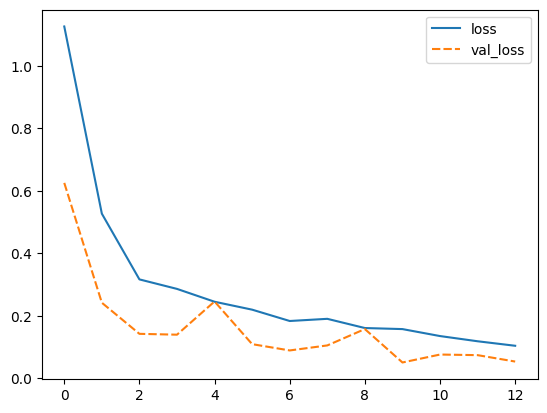

In [112]:
import seaborn as sns
sns.lineplot(data = metrics[['loss', 'val_loss']])


<Axes: >

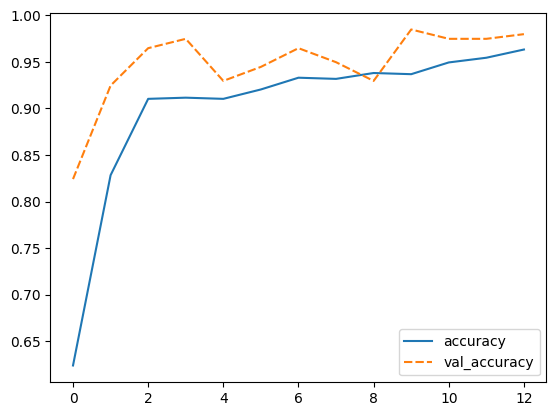

In [113]:
sns.lineplot(data = metrics[['accuracy', 'val_accuracy']])


In [114]:
y_pred = np.argmax(model.predict(X_test), axis = -1)
y_pred


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


array([0, 1, 0, 0, 2, 2, 1, 1, 2, 3, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 0, 1, 3, 0, 0, 1, 1, 0, 2, 1, 3, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 1, 1, 3, 2, 1, 1, 3, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1,
       0, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       0, 3, 0, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 3, 1, 0, 0, 2, 2, 2,
       0, 2, 3, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 3, 1,
       0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1, 2, 2, 1, 1, 2,
       2])

In [115]:
y_test = np.argmax(y_test, axis = -1)
y_test


array([0, 1, 0, 0, 2, 2, 1, 1, 2, 3, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 0, 2, 3, 0, 0, 1, 1, 0, 2, 1, 3, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 1, 1, 3, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1,
       0, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       0, 3, 0, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 3, 1, 0, 0, 2, 2, 2,
       0, 2, 3, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 3, 1,
       0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1, 2, 2, 1, 1, 2,
       2])

In [117]:

target_names= ['Por precio','Ninguna','Por alimentos',
    'Por infraestructura']

In [118]:
np.unique(y_test)


array([0, 1, 2, 3])

In [122]:
print("Clases originales:", df['etiqueta'].unique())
print("Clases en train:", np.unique(y_train))
print("Clases en test:", np.unique(y_test))


Clases originales: ['Por precio' 'Ninguna' 'Por alimentos' 'Por infraestructura']
Clases en train: [0. 1.]
Clases en test: [0 1 2 3]


In [123]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, target_names = target_names))


                     precision    recall  f1-score   support

         Por precio       1.00      1.00      1.00        33
            Ninguna       0.98      0.99      0.99       105
      Por alimentos       1.00      0.96      0.98        50
Por infraestructura       0.92      1.00      0.96        11

           accuracy                           0.98       199
          macro avg       0.97      0.99      0.98       199
       weighted avg       0.99      0.98      0.98       199



<Axes: >

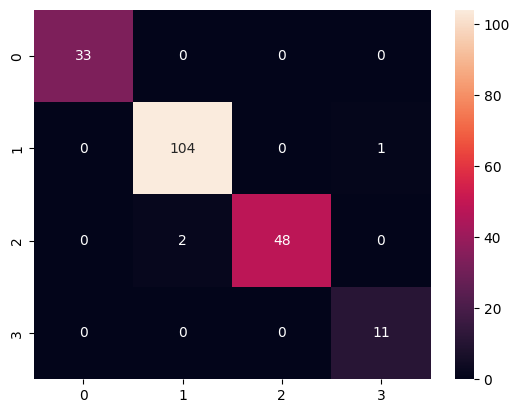

In [124]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.0f')


In [125]:
def predecir_queja(queja):
  texto = vectorize(queja)
  texto = texto.reshape(1,-1)
  texto = texto.reshape(1,-1,1)
  texto = model.predict(texto)
  print(f"""
  CATEGORIA.               PROBABILIDAD
  =====================================
  Por precio:                  {texto[0][0]}
  Ninguna:                     {texto[0][1]}
  Por alimentos:               {texto[0][2]}
  Por infraestructura.         {texto[0][3]}
  """)

In [126]:
predecir_queja("La comida fue la peor de todas")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

  CATEGORIA.               PROBABILIDAD
  Por precio:                  3.293055428343905e-08
  Ninguna:                     0.22728805243968964
  Por alimentos:               0.7727119326591492
  Por infraestructura.         1.425455673637055e-12
  
